In [1]:
import pandas as pd
import numpy as np
import random
import math

from scipy.stats import mannwhitneyu, chi2_contingency
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
skittles = pd.read_csv("indigo_skittles.csv", header=0).drop('Unnamed: 0', axis=1)
skittles

,Green,Yellow,Red,Purple,Orange,Total
0,0,1,7,2,4,14
1,2,3,3,2,3,13
2,3,1,3,2,5,14
3,2,8,1,1,2,14
4,7,0,3,1,3,14
5,6,2,5,1,0,14
6,3,2,2,3,4,14
7,2,6,2,2,2,14
8,2,4,4,2,2,14
9,6,3,2,3,1,15


## Differences between Colors

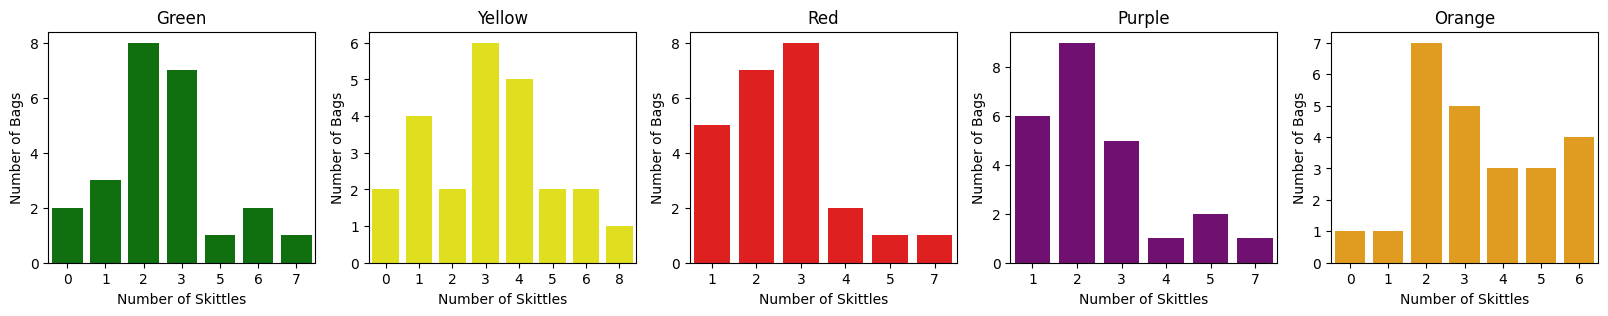

In [4]:
columns = list(skittles.columns)
columns.remove("Total")

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for i, ax in enumerate(axes.flat):
    sns.countplot(x=skittles[columns[i]], ax=ax, color=columns[i].lower())
    ax.set(xlabel="Number of Skittles", ylabel="Number of Bags", title=columns[i])

plt.subplots_adjust(wspace=0.2) 
plt.show()

Notes:
- Most of the bags had between 2-4 of each of the type of skittles.
- Some bags had as high as 8 of one color of skittle, and some had none of one type of skittle
- Every bag had at least 1 red and 1 purple skittle

In [5]:
stats = pd.DataFrame()
sums = []
for col in columns:
    stats[col] = skittles[col].describe()
    sums.append(skittles[col].sum())
stats.loc["sum"] = sums

display(stats)

,Green,Yellow,Red,Purple,Orange
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.666667,3.166667,2.625000,2.500000,3.375000
std,1.785611,1.992740,1.408437,1.503619,1.714706
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.750000,2.000000,1.750000,2.000000
50%,2.000000,3.000000,2.500000,2.000000,3.000000
75%,3.000000,4.000000,3.000000,3.000000,5.000000
max,7.000000,8.000000,7.000000,7.000000,6.000000
sum,64.000000,76.000000,63.000000,60.000000,81.000000


Notes:
- average number of each type of skittle is between 2.5 and 3.5
- high standard deviation relative to mean hints of high variability in the number of each color of skittles
- One bag had 8 yellow skittles
- The most common color of skittle is Orange, and the least common is Purple
- Even through Purple skittles was the least common, every bag had at least one
- You are more likely to find a high number of Yellow and Orange Skittles in each bag
- You are more likely to find a low number of Purple and Green Skittles in each bag

In [6]:
percentages = []
for i in range(skittles.shape[0]):
    bag = skittles.loc[i]
    bag_perc = []
    for col in columns:
        bag_perc.append(bag[col].sum()/bag.Total.sum())
    percentages.append(bag_perc)

perc_df = pd.DataFrame(percentages, columns=columns)
perc_df

,Green,Yellow,Red,Purple,Orange
0,0.000000,0.071429,0.500000,0.142857,0.285714
1,0.153846,0.230769,0.230769,0.153846,0.230769
2,0.214286,0.071429,0.214286,0.142857,0.357143
3,0.142857,0.571429,0.071429,0.071429,0.142857
4,0.500000,0.000000,0.214286,0.071429,0.214286
5,0.428571,0.142857,0.357143,0.071429,0.000000
6,0.214286,0.142857,0.142857,0.214286,0.285714
7,0.142857,0.428571,0.142857,0.142857,0.142857
8,0.142857,0.285714,0.285714,0.142857,0.142857
9,0.400000,0.200000,0.133333,0.200000,0.066667


In [7]:
perc_stats = pd.DataFrame()
sums = []
for col in perc_df.columns:
    perc_stats[col] = perc_df[col].describe()
display(perc_stats)

,Green,Yellow,Red,Purple,Orange
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.184404,0.219731,0.184799,0.176412,0.234655
std,0.122836,0.138531,0.101712,0.113701,0.116783
min,0.000000,0.000000,0.062500,0.066667,0.000000
25%,0.131250,0.126374,0.133333,0.111607,0.142857
50%,0.153846,0.222527,0.170673,0.142857,0.222527
75%,0.214286,0.291209,0.218407,0.203571,0.317708
max,0.500000,0.571429,0.500000,0.538462,0.428571


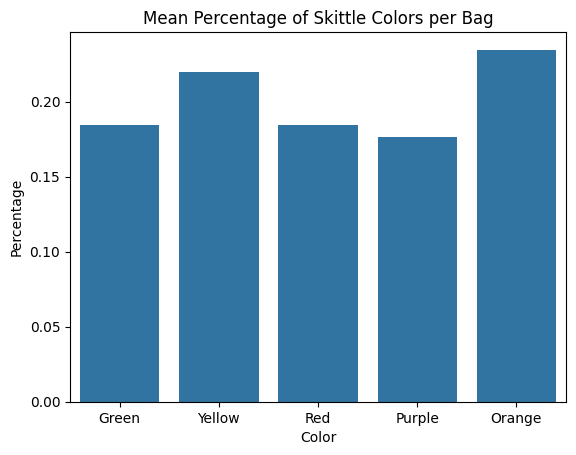

In [8]:
ax = sns.barplot(perc_stats.loc["mean"])
ax.set(xlabel="Color", ylabel = "Percentage", title = "Mean Percentage of Skittle Colors per Bag")
plt.show()

Notes:
- You are most likely to find more orange skittles than any other color in any given bag
- you are most likely to find less purple skittles than any other color in any given bag
- Overage percentage of any given skittle color is between 0.18 and 0.25 per bag

## Differences Between Bags

In [9]:
skittles_no_total = skittles.drop("Total", axis=1)

diffs = []
for i in range(skittles_no_total.shape[0]):
    bag = list(skittles_no_total.loc[i])
    diffs.append(max(bag) - min(bag))
    
skittles["color_diff"] = diffs
skittles

,Green,Yellow,Red,Purple,Orange,Total,color_diff
0,0,1,7,2,4,14,7
1,2,3,3,2,3,13,1
2,3,1,3,2,5,14,4
3,2,8,1,1,2,14,7
4,7,0,3,1,3,14,7
5,6,2,5,1,0,14,6
6,3,2,2,3,4,14,2
7,2,6,2,2,2,14,4
8,2,4,4,2,2,14,2
9,6,3,2,3,1,15,5


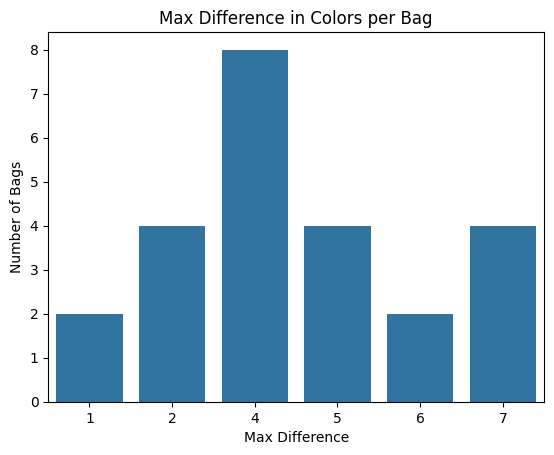

count    24.000000
mean      4.250000
std       1.870829
min       1.000000
25%       3.500000
50%       4.000000
75%       5.250000
max       7.000000
Name: color_diff, dtype: float64

In [10]:
ax = sns.countplot(x=skittles.color_diff)
ax.set(xlabel="Max Difference", ylabel="Number of Bags", title="Max Difference in Colors per Bag")
plt.show()
skittles.color_diff.describe()

Notes:
- there were 2 bags that had the lowest difference in the number of skittle colors (1)
- there were 4 bags that had the highest difference in the number of skittle colors (7)
- There more bags that have high variance in the number of skittle colors than bags that have low variance.
- The mean difference in skittle colors in 4.375 (in other words, on average you find a difference of 4-5 skittle colors per bag)

  Ex: you more likely to find a bag that has 2 purple skittles and 6 yellows, rather than 3 purple and 5 yellows

<Axes: xlabel='Total', ylabel='count'>

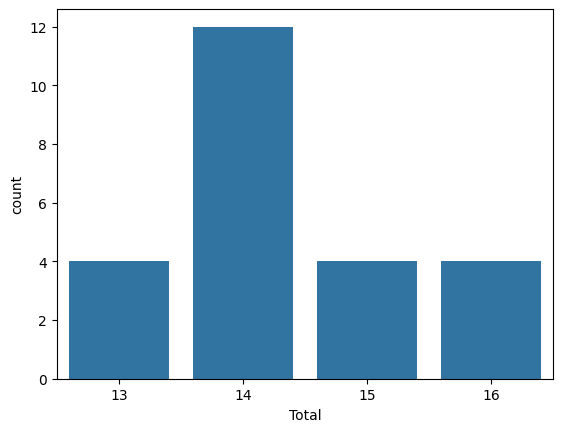

In [11]:
sns.countplot(x=skittles.Total)

Notes:
- about 50% of the bags have 14 skittles, whereas 16.6% of the bags have either 13, 15, or 16 skittles